## Free energy analysis of D3R dataset 2 in comparison to experimental data

### Instructions
This notebook contains all the analysis carried out for the D3R Grand Challenge 2 analysis by Antonia Mey, Jordi Juarez Jimenez and Julien Michel. Simply run the notebook in order to recreate the analysis done in the accompanying publication. The analysis relies on a small module called freenergyworkflows. Please use version 0.3.5 to recreate the exact results used in the publications. 

Freenergy workflows can be installed from the github repository: https://github.com/michellab/freenrgworkflows or using pip:

```pip install freenergyworkflows```

### Imports

In [1]:
%pylab inline
from networkanalysis.experiments import ExperimentalData
from networkanalysis.stats import freeEnergyStats
from networkanalysis.plotting import FreeEnergyPlotter
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
import networkanalysis
print networkanalysis.__version__

0.3.5


## 1. Reference experimental data released by organisers 

In [3]:
exp = ExperimentalData()
exp.compute_DDG_from_IC50s('IC50_set2.csv', reference='FXR_10')
exp_ddg = exp.freeEnergiesInKcal

## 2. Stage 1 Analysis

### Expert opinion from visual inspection 

In [4]:
visual = ExperimentalData()
visual.read_free_energies('Stage1/submission/Full_set_visual_free_energies.csv')
visual_ddg = visual.freeEnergiesInKcal

In [5]:
stats = freeEnergyStats()
c_list = ['FXR_10','FXR_12','FXR_38','FXR_41','FXR_73','FXR_74','FXR_75','FXR_76','FXR_77','FXR_78','FXR_79','FXR_81','FXR_82','FXR_83','FXR_84','FXR_85','FXR_88','FXR_89']
stats.generate_statistics(visual_ddg,exp_ddg,repeats=20000, compound_list=c_list)

In [6]:
r_error = stats.R_error
tau_error = stats.tau_error
mue_error = stats.mue_error
print "R is: %.2f < %.2f < %.2f" %(r_error[0], stats.R, r_error[1])
print "Mue is: %.2f < %.2f < %.2f" %(mue_error[0], stats.mue, mue_error[1])
print "tau is: %.2f < %.2f < %.2f" %(tau_error[0], stats.tau, tau_error[1])

R is: 0.18 < 0.23 < 0.28
Mue is: 1.69 < 1.78 < 1.87
tau is: 0.16 < 0.20 < 0.24


['FXR_10' 'FXR_12' 'FXR_38' 'FXR_41' 'FXR_73' 'FXR_74' 'FXR_75' 'FXR_76'
 'FXR_77' 'FXR_78' 'FXR_79' 'FXR_81' 'FXR_82' 'FXR_83' 'FXR_84' 'FXR_85'
 'FXR_88' 'FXR_89']


(<matplotlib.axes._subplots.AxesSubplot at 0x114109690>,
 <matplotlib.figure.Figure at 0x1037f87d0>)

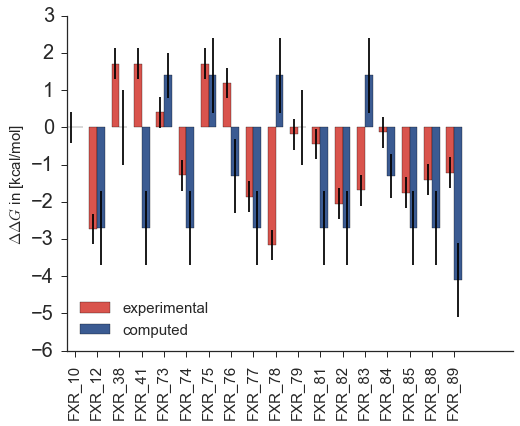

In [7]:
plotter = FreeEnergyPlotter(exp_ddg, visual_ddg)
plotter.plot_bar_plot()

### Visual same charge

In [8]:
visual = ExperimentalData()
visual.read_free_energies('Stage1/submission/Full_set_visual_free_energies.csv')
visual_ddg = visual.freeEnergiesInKcal

In [9]:
stats = freeEnergyStats()
c_list = ['FXR_10','FXR_12','FXR_74','FXR_76','FXR_77','FXR_78','FXR_79','FXR_81','FXR_82','FXR_83','FXR_84','FXR_85','FXR_88','FXR_89']
stats.generate_statistics(visual_ddg,exp_ddg,repeats=20000, compound_list=c_list)

In [10]:
r_error = stats.R_error
tau_error = stats.tau_error
mue_error = stats.mue_error
print "R is: %.2f < %.2f < %.2f" %(r_error[0], stats.R, r_error[1])
print "Mue is: %.2f < %.2f < %.2f" %(mue_error[0], stats.mue, mue_error[1])
print "tau is: %.2f < %.2f < %.2f" %(tau_error[0], stats.tau, tau_error[1])

R is: -0.04 < 0.02 < 0.09
Mue is: 1.62 < 1.72 < 1.82
tau is: 0.03 < 0.09 < 0.14


### Full set averaged network

In [11]:
full = ExperimentalData()
full.read_free_energies('Stage1/submission/Full_set_network_avg_free_energies.csv')
full_ddg = full.freeEnergiesInKcal

In [12]:
stats = freeEnergyStats()
c_list = ['FXR_10','FXR_12','FXR_38','FXR_41','FXR_73','FXR_74','FXR_75','FXR_76','FXR_77','FXR_78','FXR_79','FXR_81','FXR_82','FXR_83','FXR_84','FXR_85','FXR_88','FXR_89']
stats.generate_statistics(full_ddg,exp_ddg,repeats=20000, compound_list=c_list)

In [13]:
r_error = stats.R_error
tau_error = stats.tau_error
mue_error = stats.mue_error
print "R is: %f < %f < %f" %(r_error[0], stats.R, r_error[1])
print "Mue is: %f < %f < %f" %(mue_error[0], stats.mue, mue_error[1])
print "tau is: %f < %f < %f" %(tau_error[0], stats.tau, tau_error[1])

R is: -0.617823 < -0.572749 < -0.536128
Mue is: 3.038219 < 3.174912 < 3.303312
tau is: -0.330049 < -0.275456 < -0.224433


['FXR_10' 'FXR_12' 'FXR_38' 'FXR_41' 'FXR_73' 'FXR_74' 'FXR_75' 'FXR_76'
 'FXR_77' 'FXR_78' 'FXR_79' 'FXR_81' 'FXR_82' 'FXR_83' 'FXR_84' 'FXR_85'
 'FXR_88' 'FXR_89']


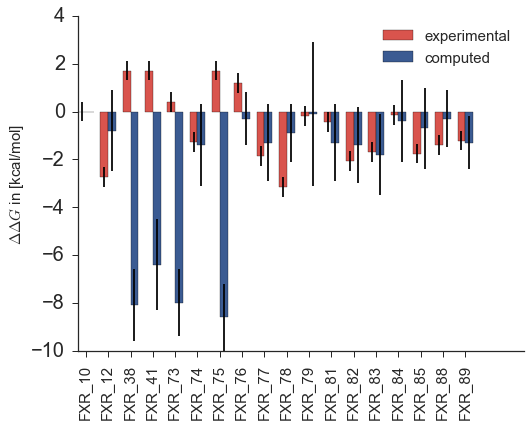

In [14]:
plotter = FreeEnergyPlotter(exp_ddg, full_ddg)
ax,fig = plotter.plot_bar_plot()

### Same charge

In [15]:
same_charge= ExperimentalData()
same_charge.read_free_energies('Stage1/submission/Same_net_charge_free_energies.csv')
same_charge_ddg = same_charge.freeEnergiesInKcal

In [16]:
stats = freeEnergyStats()
c_list = ['FXR_10','FXR_12','FXR_74','FXR_76','FXR_77','FXR_78','FXR_79','FXR_81','FXR_82','FXR_83','FXR_84','FXR_85','FXR_88','FXR_89']
stats.generate_statistics(same_charge_ddg,exp_ddg,repeats=20000, compound_list=c_list)

In [17]:
r_error = stats.R_error
tau_error = stats.tau_error
mue_error = stats.mue_error
print "R is: %f < %f < %f" %(r_error[0], stats.R, r_error[1])
print "Mue is: %f < %f < %f" %(mue_error[0], stats.mue, mue_error[1])
print "tau is: %f < %f < %f" %(tau_error[0], stats.tau, tau_error[1])

R is: 0.104306 < 0.202924 < 0.321206
Mue is: 1.217102 < 1.353645 < 1.469279
tau is: 0.076923 < 0.151341 < 0.230769


(<matplotlib.axes._subplots.AxesSubplot at 0x114778490>,
 <matplotlib.figure.Figure at 0x114772950>)

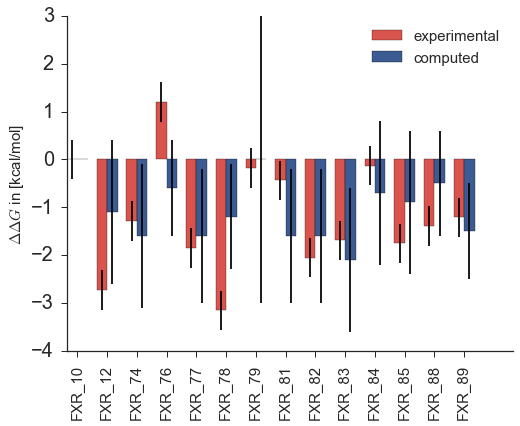

In [18]:
plotter = FreeEnergyPlotter(exp_ddg, same_charge_ddg, c_list)
plotter.plot_bar_plot()

## 3. Stage 2

### Unscaled network

In [19]:
sim = ExperimentalData()
sim.read_free_energies('Stage2/submission/Network_unscaled_free_energies.csv')
sim_ddg = sim.freeEnergiesInKcal

In [20]:
stats = freeEnergyStats()

In [21]:
c_list = ['FXR_10','FXR_12','FXR_38','FXR_41','FXR_73','FXR_74','FXR_75','FXR_76','FXR_77','FXR_78','FXR_79','FXR_81','FXR_82','FXR_83','FXR_84','FXR_85','FXR_88','FXR_89']

In [22]:
plotter = FreeEnergyPlotter(exp_ddg, sim_ddg)

['FXR_10' 'FXR_12' 'FXR_38' 'FXR_41' 'FXR_73' 'FXR_74' 'FXR_75' 'FXR_76'
 'FXR_77' 'FXR_78' 'FXR_79' 'FXR_81' 'FXR_82' 'FXR_83' 'FXR_84' 'FXR_85'
 'FXR_88' 'FXR_89']


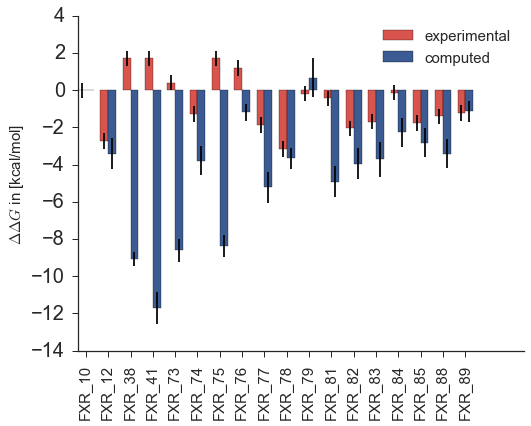

In [23]:
ax,fig = plotter.plot_bar_plot()

In [24]:
stats.generate_statistics(sim_ddg,exp_ddg,repeats=20000, compound_list=c_list)

In [25]:
r_error = stats.R_error
tau_error = stats.tau_error
mue_error = stats.mue_error
print "R is: %.2f < %.2f < %.2f" %(r_error[0], stats.R, r_error[1])
print "Mue is: %.2f < %.2f < %.2f" %(mue_error[0], stats.mue, mue_error[1])
print "tau is: %.2f < %.2f < %.2f" %(tau_error[0], stats.tau, tau_error[1])

R is: -0.47 < -0.44 < -0.42
Mue is: 3.71 < 3.79 < 3.87
tau is: -0.16 < -0.13 < -0.11


### Network mixed scaling

In [26]:
sim_scaled = ExperimentalData()
sim_scaled.read_free_energies('Stage2/submission/Network_mixedscaling_free_energies.csv')

In [27]:
sim_ddg_scaled = sim_scaled.freeEnergiesInKcal

In [28]:
plotter = FreeEnergyPlotter(exp_ddg, sim_ddg_scaled)

['FXR_10' 'FXR_12' 'FXR_38' 'FXR_41' 'FXR_73' 'FXR_74' 'FXR_75' 'FXR_76'
 'FXR_77' 'FXR_78' 'FXR_79' 'FXR_81' 'FXR_82' 'FXR_83' 'FXR_84' 'FXR_85'
 'FXR_88' 'FXR_89']


(<matplotlib.axes._subplots.AxesSubplot at 0x118089450>,
 <matplotlib.figure.Figure at 0x1177c82d0>)

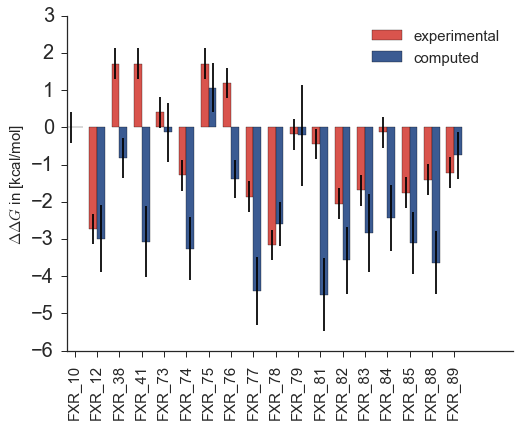

In [29]:
plotter.plot_bar_plot()

In [30]:
stats = freeEnergyStats()
stats.generate_statistics(sim_ddg_scaled,exp_ddg,repeats=20000, compound_list=c_list)
r_error = stats.R_error
tau_error = stats.tau_error
mue_error = stats.mue_error
print "R is: %.2f < %.2f < %.2f" %(r_error[0], stats.R, r_error[1])
print "Mue is: %.2f < %.2f < %.2f" %(mue_error[0], stats.mue, mue_error[1])
print "tau is: %.2f < %.2f < %.2f" %(tau_error[0], stats.tau, tau_error[1])

R is: 0.46 < 0.50 < 0.55
Mue is: 1.69 < 1.77 < 1.85
tau is: 0.34 < 0.38 < 0.41


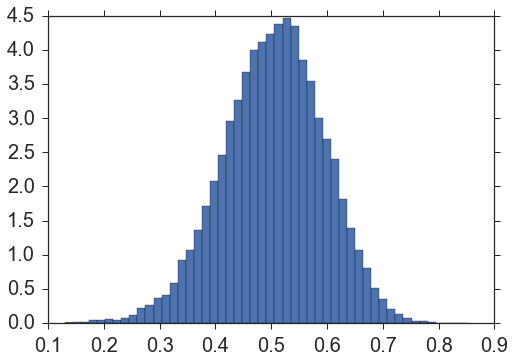

In [31]:
b = plt.hist(stats._R, bins=50, normed=True)

### Same charge

In [32]:
sim_same_charge = ExperimentalData()
sim_same_charge.read_free_energies('Stage2/submission/Same_charge_unscaled_free_energies.csv')
same_charge_ddg = sim_same_charge.freeEnergiesInKcal

In [33]:
plotter = FreeEnergyPlotter(exp_ddg, same_charge_ddg)

['FXR_10' 'FXR_12' 'FXR_74' 'FXR_76' 'FXR_77' 'FXR_78' 'FXR_79' 'FXR_81'
 'FXR_82' 'FXR_83' 'FXR_84' 'FXR_85' 'FXR_88' 'FXR_89']


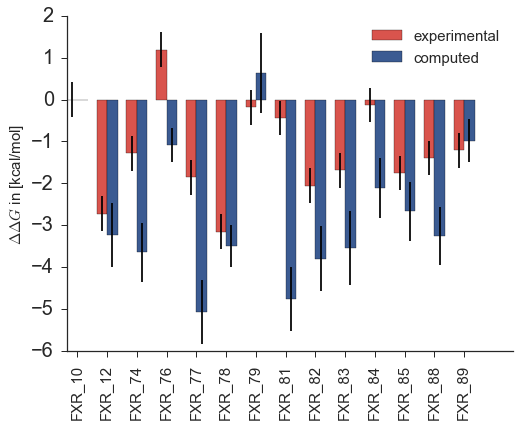

In [34]:
ax, fig = plotter.plot_bar_plot()

In [35]:
stats = freeEnergyStats()
c_list = ['FXR_10','FXR_12','FXR_74','FXR_76','FXR_77','FXR_78','FXR_79','FXR_81','FXR_82','FXR_83','FXR_84','FXR_85','FXR_88','FXR_89']

stats.generate_statistics(same_charge_ddg,exp_ddg,repeats=20000,compound_list=c_list)
r_error = stats.R_error
tau_error = stats.tau_error
mue_error = stats.mue_error
print "R is: %.2f < %.2f < %.2f" %(r_error[0], stats.R, r_error[1])
print "Mue is: %.2f < %.2f < %.2f" %(mue_error[0], stats.mue, mue_error[1])
print "tau is: %.2f < %.2f < %.2f" %(tau_error[0], stats.tau, tau_error[1])

R is: 0.50 < 0.54 < 0.57
Mue is: 1.59 < 1.67 < 1.75
tau is: 0.36 < 0.39 < 0.43


### Same charge scaled 

In [36]:
sim_same_charge_scale = ExperimentalData()
sim_same_charge_scale.read_free_energies('Stage2/submission/Same_charge_scaled_free_energies.csv')
same_charge_scale_ddg = sim_same_charge_scale.freeEnergiesInKcal

['FXR_10' 'FXR_12' 'FXR_74' 'FXR_76' 'FXR_77' 'FXR_78' 'FXR_79' 'FXR_81'
 'FXR_82' 'FXR_83' 'FXR_84' 'FXR_85' 'FXR_88' 'FXR_89']


(<matplotlib.axes._subplots.AxesSubplot at 0x1183e1b90>,
 <matplotlib.figure.Figure at 0x118a356d0>)

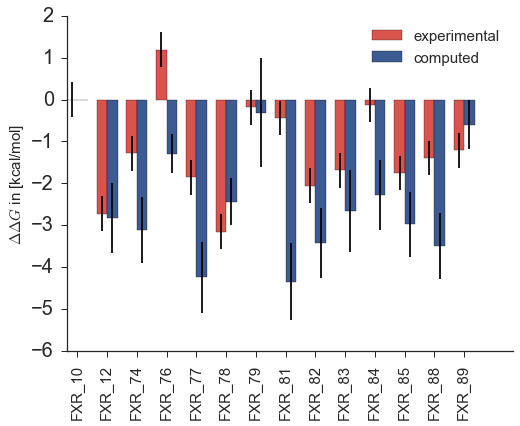

In [37]:
plotter = FreeEnergyPlotter(exp_ddg, same_charge_scale_ddg)
plotter.plot_bar_plot()

In [38]:
stats = freeEnergyStats()
stats.generate_statistics(same_charge_scale_ddg,exp_ddg,repeats=20000,compound_list=c_list)
r_error = stats.R_error
tau_error = stats.tau_error
mue_error = stats.mue_error
print "R is: %f < %f < %f" %(r_error[0], stats.R, r_error[1])
print "Mue is: %f < %f < %f" %(mue_error[0], stats.mue, mue_error[1])
print "tau is: %f < %f < %f" %(tau_error[0], stats.tau, tau_error[1])

R is: 0.356559 < 0.405372 < 0.459520
Mue is: 1.474762 < 1.562695 < 1.646338
tau is: 0.252747 < 0.307982 < 0.362637
